In [1]:
from matplotlib import pyplot
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1_l2

In [2]:
X, Y = make_moons(n_samples=100, noise=0.2, random_state=1)
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:]
trainY, testY = Y[:n_train], Y[n_train:]
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(30, 2)
(30,)
(70, 2)
(70,)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               1500      
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 940ms/step - loss: 0.6755 - accuracy: 0.7333 - val_loss: 0.6797 - val_accuracy: 0.6143
Epoch 2/100
1/1 [==============================] - 0s 58ms/step - loss: 0.6598 - accuracy: 0.8333 - val_loss: 0.6698 - val_accuracy: 0.6571
Epoch 3/100
1/1 [==============================] - 0s 54ms/step - loss: 0.6445 - accuracy: 0.8667 - val_loss: 0.6602 - val_accuracy: 0.6571

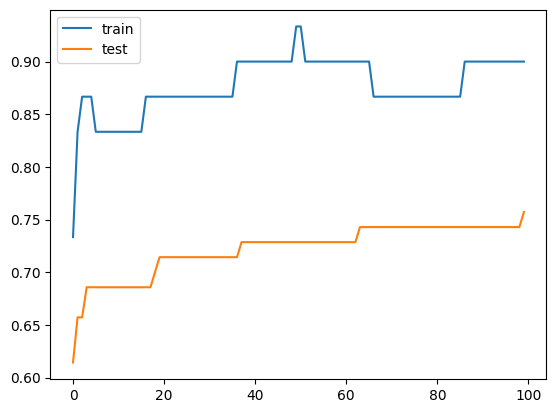

In [3]:
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 500)               1500      
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6946 - accuracy: 0.6333 - val_loss: 0.6921 - val_accuracy: 0.5286
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 0.6779 - accuracy: 0.7000 - val_loss: 0.6813 - val_accuracy: 0.6857
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6616 - accuracy: 0.8000 - val_loss: 0.6709 - val_accuracy: 0.7000


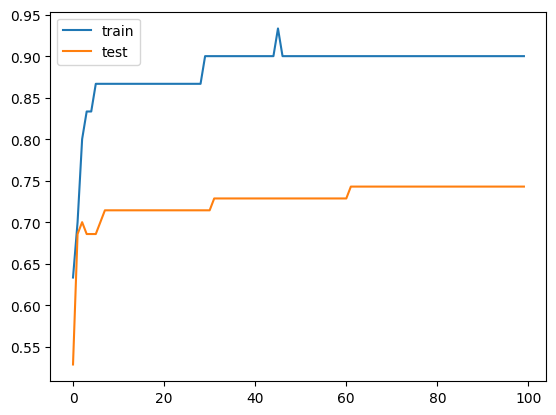

In [4]:
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               1500      
                                                                 
 dense_5 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 844ms/step - loss: 0.7822 - accuracy: 0.1667 - val_loss: 0.7565 - val_accuracy: 0.5143
Epoch 2/100
1/1 [==============================] - 0s 67ms/step - loss: 0.7640 - accuracy: 0.4667 - val_loss: 0.7448 - val_accuracy: 0.6286
Epoch 3/100
1/1 [==============================] - 0s 52ms/step - loss: 0.7463 - accuracy: 0.6000 - val_loss: 0.7335 - val_accuracy: 0.77

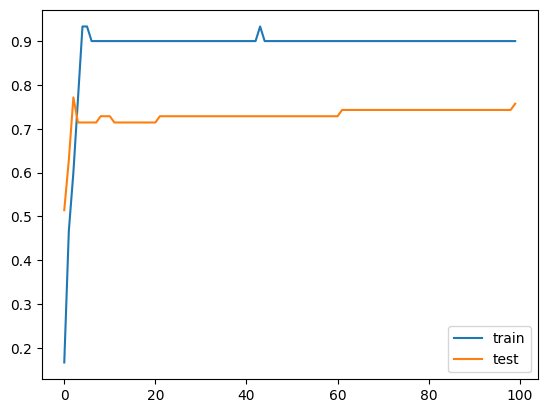

In [5]:
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
